In [15]:
import torch
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

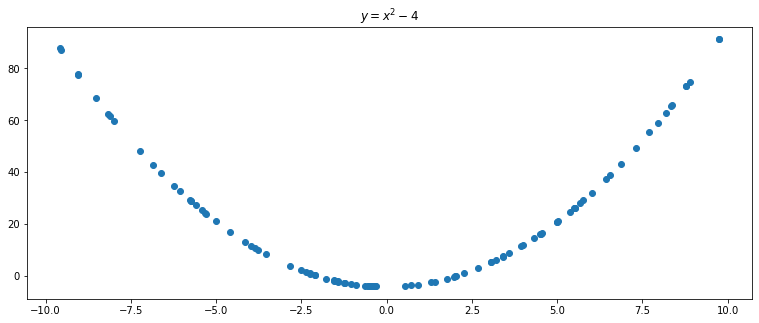

In [16]:
x_train = torch.rand(100)    
x_train = x_train * 20 - 10      # else x_train > 0

y_train = x_train**2 - 4

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = x^2 - 4$');

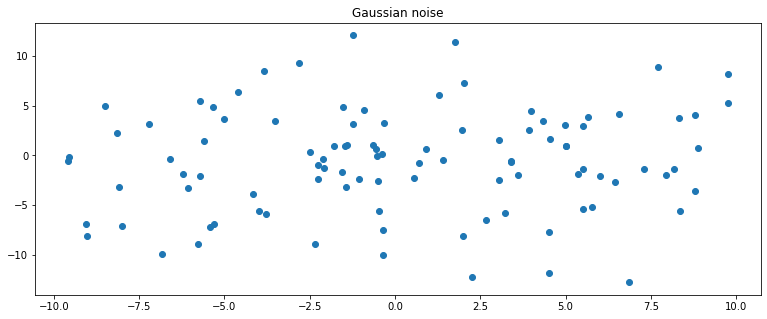

In [17]:
noise = torch.randn(y_train.shape) / 0.2
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.title('Gaussian noise');

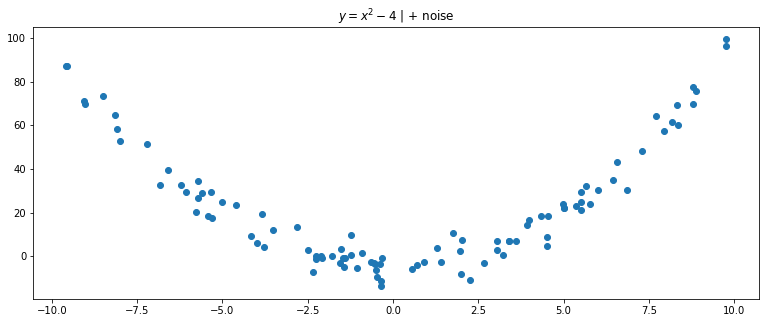

In [18]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = x^2 - 4$ | + noise');

In [19]:
x_train.unsqueeze_(1)         # create 2d tensor
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 10, 100)
y_validation = (x_validation.data)**2 - 4

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[96.0000],
        [92.0004],
        [88.0824],
        [84.2461],
        [80.4914],
        [76.8183],
        [73.2268],
        [69.7170],
        [66.2887],
        [62.9421],
        [59.6772],
        [56.4938],
        [53.3921],
        [50.3720],
        [47.4335],
        [44.5767],
        [41.8014],
        [39.1078],
        [36.4959],
        [33.9655],
        [31.5168],
        [29.1497],
        [26.8642],
        [24.6603],
        [22.5381],
        [20.4975],
        [18.5385],
        [16.6612],
        [14.8654],
        [13.1513],
        [11.5188],
        [ 9.9680],
        [ 8.4987],
        [ 7.1111],
        [ 5.8051],
        [ 4.5808],
        [ 3.4380],
        [ 2.3769],
        [ 1.3974],
        [ 0.4995],
        [-0.3167],
        [-1.0513],
        [-1.7043],
        [-2.2757],
        [-2.7654],
        [-3.1736],
        [-3.5001],
        [-3.7449],
        [-3.9082],
        [-3.9898],
        [-3.9898],
        [-3.9082],
        [-3.

In [20]:
class XSqrMinus4(torch.nn.Module):             # Initialization NN
    def __init__(self, n_hidden_neurons):
        super(XSqrMinus4, self).__init__()

        self.fc1 = torch.nn.Linear(in_features=1, out_features=n_hidden_neurons, bias=True)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(in_features=n_hidden_neurons, out_features=n_hidden_neurons, bias=True)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(in_features=n_hidden_neurons, out_features=1, bias=True)



    def forward(self, x):               #forward pass
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)

        return x

XSqr_Minus4 = XSqrMinus4(20)

In [21]:
def predict(Sqr, x, y, n):             
    y_pred = Sqr.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    num_epoch = (n + 1) * 200
    plt.title(num_epoch)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()
    time.sleep(1)

In [22]:
optimizer = torch.optim.Adam(XSqr_Minus4.parameters(), lr=0.01)

In [23]:
def loss(pred, target):
    MSE = (pred - target) ** 2
    return MSE.mean()

Loss = tensor(281.6057, grad_fn=<MeanBackward0>)


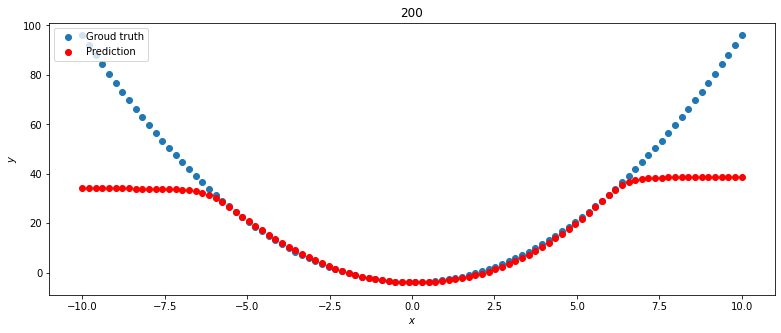

Loss = tensor(97.9647, grad_fn=<MeanBackward0>)


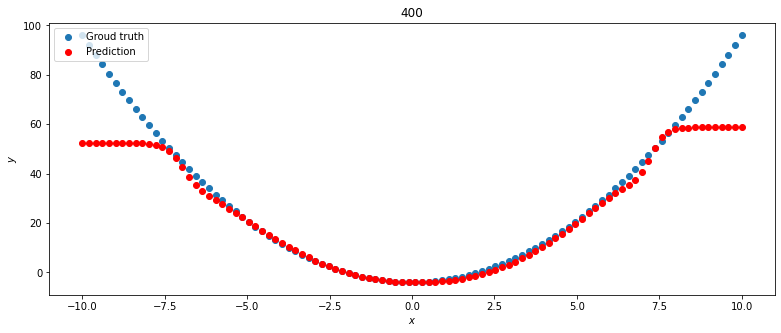

Loss = tensor(53.3515, grad_fn=<MeanBackward0>)


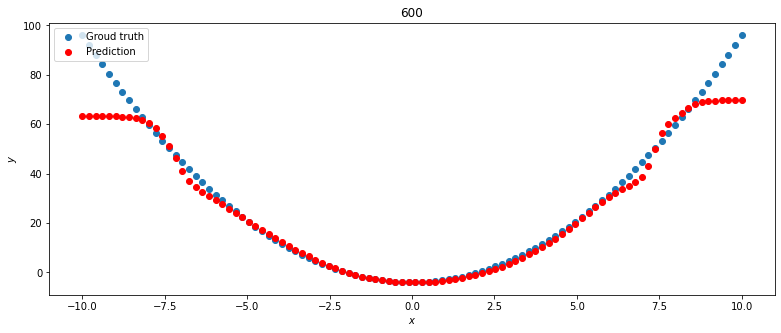

Loss = tensor(37.2328, grad_fn=<MeanBackward0>)


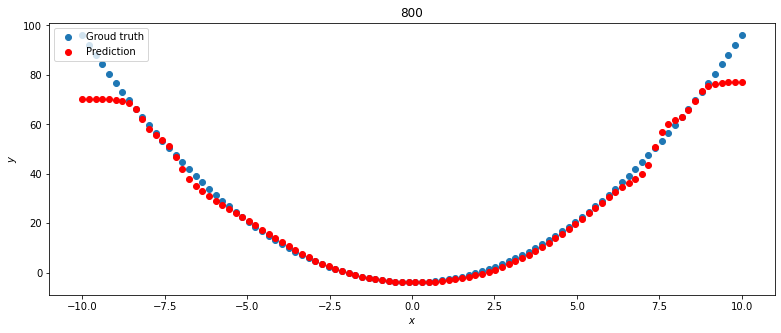

Loss = tensor(30.8750, grad_fn=<MeanBackward0>)


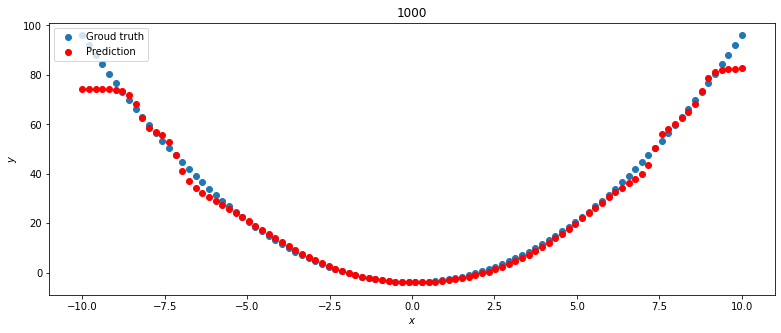

Loss = tensor(27.3393, grad_fn=<MeanBackward0>)


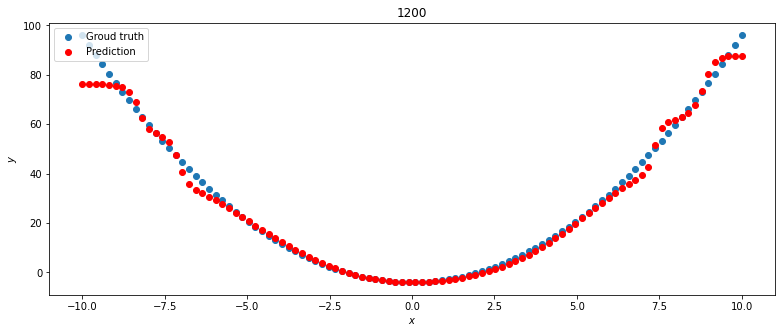

Loss = tensor(25.8151, grad_fn=<MeanBackward0>)


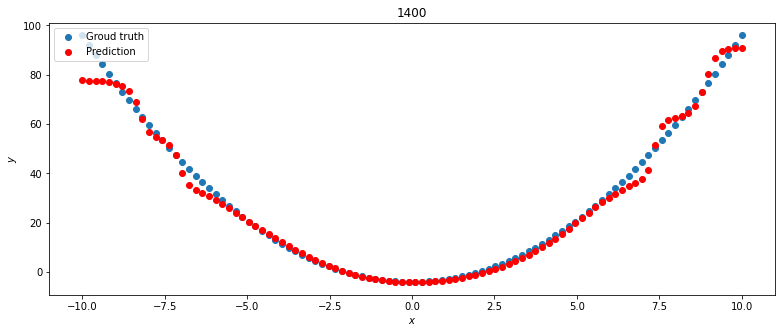

Loss = tensor(24.5102, grad_fn=<MeanBackward0>)


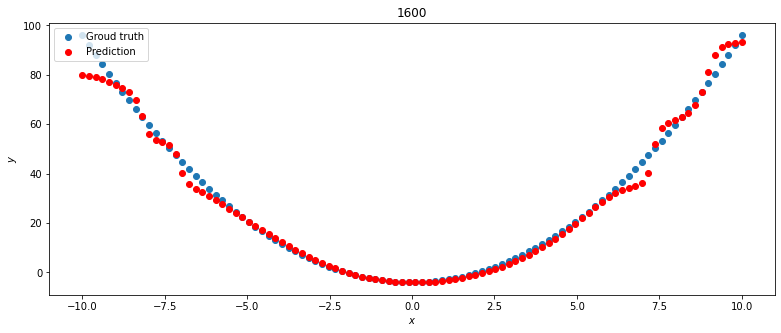

Loss = tensor(23.2649, grad_fn=<MeanBackward0>)


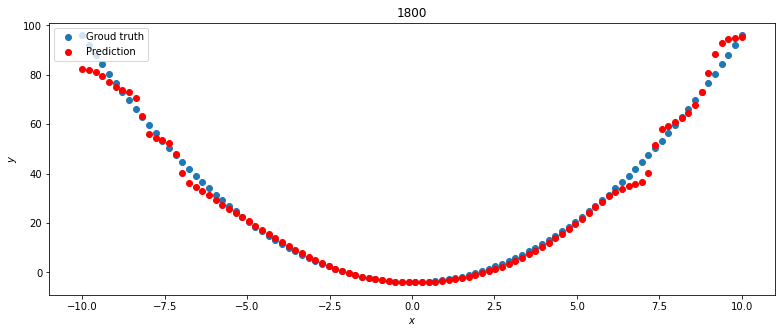

Loss = tensor(22.5972, grad_fn=<MeanBackward0>)


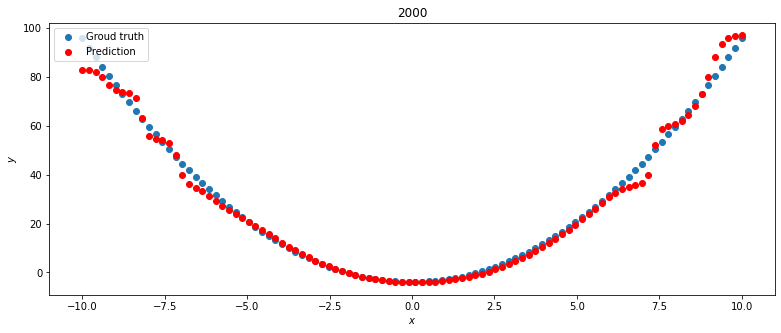

In [24]:
for Loss_plot in range(10):
    for epoch_index in range(200):
        optimizer.zero_grad()

        y_pred = XSqr_Minus4.forward(x_train)
        loss_val = loss(y_pred, y_train)

        loss_val.backward()

        optimizer.step()
    print('Loss =', loss(y_pred, y_train))
    predict(XSqr_Minus4, x_validation, y_validation, Loss_plot)